In [172]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce/Ecommerce Customers


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [174]:

df=pd.read_csv('/kaggle/input/ecommerce/Ecommerce Customers')

#### 2. Summarize important observations from the data set (5 MARKS)
* a. What are the number of rows and no. of cols & types of variables (continuous, categorical etc.)
* b. Calculate five-point summary for numerical variables
* c. Summarize observations for categorical variables – no. of categories, % observations in each category

In [175]:
# Shape of data:
df.shape

(500, 8)

In [176]:
# categorical and numerical features:
print('categorical features: ',df.select_dtypes(include='object').columns.tolist())
print('numerical features: ',df.select_dtypes(exclude='object').columns.tolist())

categorical features:  ['Email', 'Address', 'Avatar']
numerical features:  ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']


In [177]:
# 5 point summary of numerical
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [178]:
#Summarize observations for categorical variables – no. of categories, % observations in each category
for i in df.select_dtypes(include='object').columns:
    print('feature:',i,',no of unique categories:',df[i].nunique())
    print(100*df[i].nunique()/df[i].shape[0],f'% classes present of feature {i}\n' )

feature: Email ,no of unique categories: 500
100.0 % classes present of feature Email

feature: Address ,no of unique categories: 500
100.0 % classes present of feature Address

feature: Avatar ,no of unique categories: 138
27.6 % classes present of feature Avatar



#### 3. Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 MARKS)
Some pointers which would help you, but don’t be limited by these

* a. Do variables have missing/null values?
* b. Do variables have outliers?
* c. Is the target variable normally distributed? If yes, rectify it.

In [179]:
# a. Do variables have missing/null values?
# Check if null values are present:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

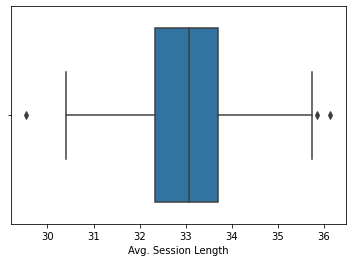

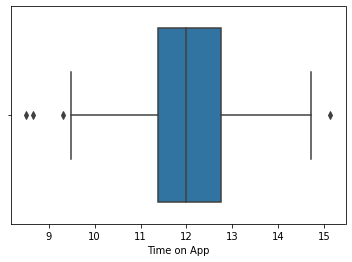

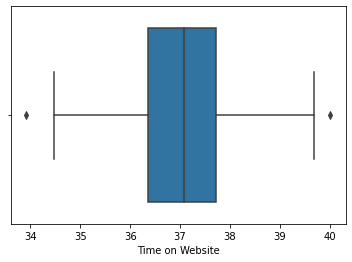

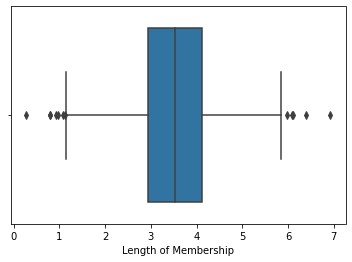

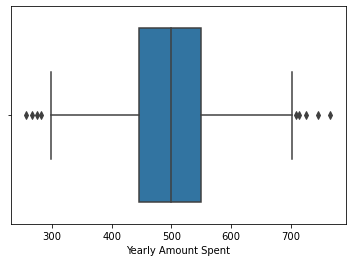

In [180]:
#  b. Do variables have outliers?
# Check if outliers are present:
for i in df.select_dtypes(exclude='object'):
    sns.boxplot(df[i])
    plt.show()

In [181]:
# Outlier checking:
#outlier treatment for Value:
def ol(i):
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.5)
    q3=df[i].quantile(0.75)
    iqr=q3-q1

    LL=q1-1.5*iqr
    UL=q3+ 1.5*iqr
    print('feature:',i,'  no of outliers:',df[df[i]>UL].shape[0])

for i in df.select_dtypes(exclude='object').columns.tolist():
    ol(i)

feature: Avg. Session Length   no of outliers: 2
feature: Time on App   no of outliers: 1
feature: Time on Website   no of outliers: 1
feature: Length of Membership   no of outliers: 5
feature: Yearly Amount Spent   no of outliers: 5


skew: 0.034790184115234546 krutosis: 0.46397553251064405


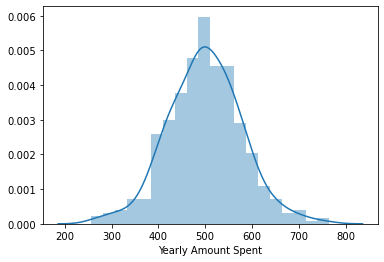

In [182]:
#  c. Is the target variable normally distributed? If yes, rectify it.
print('skew:',df['Yearly Amount Spent'].skew(),'krutosis:',df['Yearly Amount Spent'].kurtosis())
sns.distplot(df['Yearly Amount Spent'])
plt.show()

In [183]:
import scipy.stats as st
# H0- Data is normal
# HA- Data is not normal
stat,pval=st.shapiro(df['Yearly Amount Spent'])
if pval>0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')
    
## test using jarque berra:   
stat,pval=st.jarque_bera(df['Yearly Amount Spent'])
if pval>0.05:
    print('Fail to reject H0')
else:
    print('Reject H0')
    
# So,we fail to reject H0 meaning our data is normal.
# No need to apply any transformations.

Fail to reject H0
Fail to reject H0


#### 4. Summarize relationships among variables (10 MARKS)
* a. Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


* b. Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?
Hint: based on your observations you may want to transform features or create additional features.

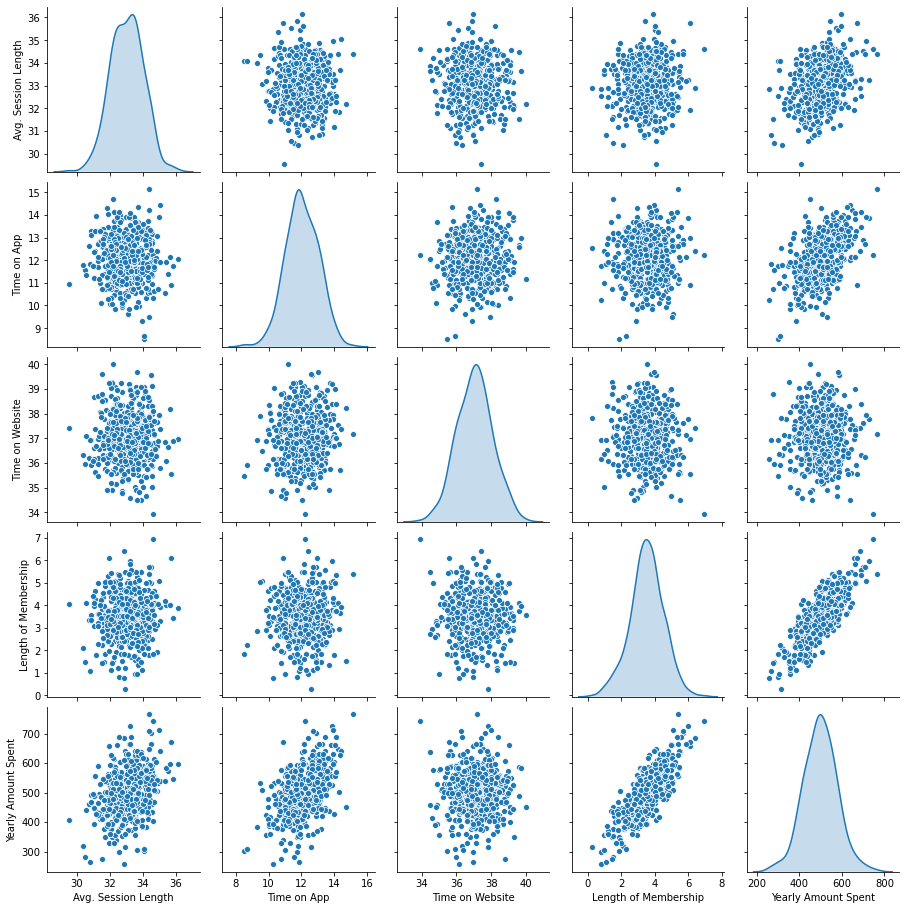

In [184]:
# a. Plot correlation plots. Which are the variables most correlated with Target? 
# Which independent variables are correlated among themselves? Do you want to exclude some variables from the model 
# based on this analysis? What other actions will you take?


# b. Plot all independent variables with the target. Are all relationships linear?
# If not, what steps would you take based on this information?

sns.pairplot(df,diag_kind='kde')
plt.show()


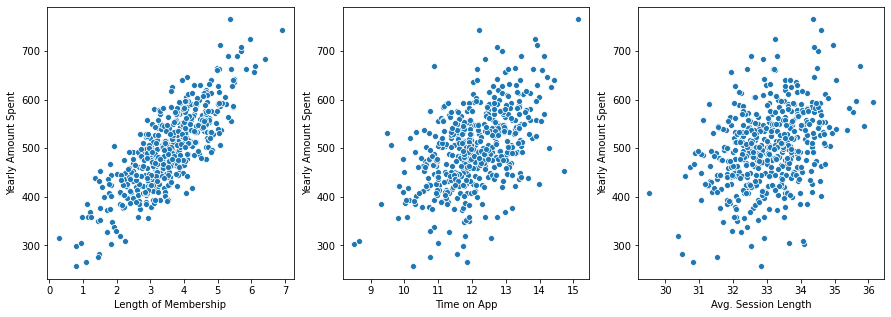

In [185]:
# We can observe from the pairplot that length of membership has linear relationship with target variable.
# also,time on app,Avg. Session Length also has linear relation ship with target variable.
fig,axes=plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(df['Length of Membership'],df['Yearly Amount Spent'],ax=axes[0])
sns.scatterplot(df['Time on App'],df['Yearly Amount Spent'],ax=axes[1])
sns.scatterplot(df['Avg. Session Length'],df['Yearly Amount Spent'],ax=axes[2])
plt.show()

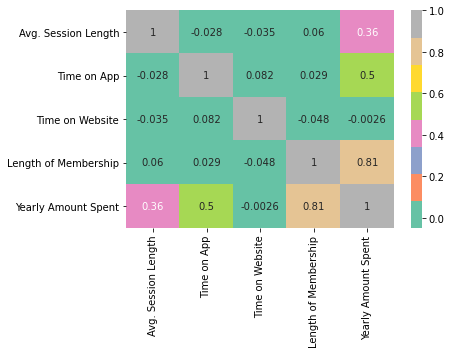

In [186]:
sns.heatmap(df.corr(),annot=True,cmap='Set2')
plt.show()

In [187]:
# 1st we will definitely keep the above 3 features based on scatterplot as they show linear relation with taget.
# It is evident from scatterplot and heatmap as well.
# We can also try with feature selection techniques for numerical features such as filter method,wrapper methods.
# We can also check for multicollinearity using VIF.

In [188]:
# Checking with vif:
X=df.select_dtypes(exclude='object').iloc[:,:-1].copy()
y=df['Yearly Amount Spent']
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Feature']=X.columns
vif.sort_values('VIF',ascending=False)
#we can try with dropping time on website 1st then checking impact of it on model.
# All the features are multicollinear.

,VIF,Feature
2,658.495572,Time on Website
0,613.185924,Avg. Session Length
1,144.019714,Time on App
3,13.578801,Length of Membership


In [189]:
# We can try to find out related two features are so if they are similar in nature we can merge them to create new feature.
df.head(2)
# We have to perform statistical test to identify if features are related or not
# time is a concept which is common to us,so we can merge them based on time.
# H0- features are same(since means are same)
# HA- features are different(since means are different)
print(st.ttest_ind(df['Time on App'],df['Time on Website']))
print(st.mannwhitneyu(df['Time on App'],df['Time on Website']))
print('pearon relation: ',st.pearsonr(df['Time on App'],df['Time on Website'])) # There is no relation.
# So we can not merge them.

Ttest_indResult(statistic=-394.4696051709568, pvalue=0.0)
MannwhitneyuResult(statistic=0.0, pvalue=2.9281214567494703e-165)
pearon relation:  (0.08238827319098166, 0.06565420172184916)


In [190]:
# Feature selection techniques:[RFE]
# WE will try with numerical features only.
import statsmodels.api as sm

# forward feature selection using adjusted Rsquare
X=df.select_dtypes(exclude='object').iloc[:,:-1].copy()
y=df['Yearly Amount Spent']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
rfe=RFE(lr,3)
rfe.fit(X,y)

Rank=pd.DataFrame()
Rank['RANK']=rfe.ranking_
Rank['Feature']=X.columns
Rank.sort_values('RANK')

,RANK,Feature
0,1,Avg. Session Length
1,1,Time on App
3,1,Length of Membership
2,2,Time on Website


In [191]:
# Feature selection techniques:[backward elimination]:
# WE will try with numerical features only.
while(len(X.columns)>0):
    inp_c=sm.add_constant(X)
    ols_pf=sm.OLS(y,inp_c)
    mod_pf=ols_pf.fit()
    f=mod_pf.pvalues[1:].idxmax()
    if mod_pf.pvalues[1:].max()>0.05:
        X=X.drop(f,1)
    else:
        break
print('The final features through backward eliminations are :',X.columns)

The final features through backward eliminations are : Index(['Avg. Session Length', 'Time on App', 'Length of Membership'], dtype='object')


In [192]:
# forward feature selection using adjusted Rsquare
X=df.select_dtypes(exclude='object').iloc[:,:-1].copy()
y=df['Yearly Amount Spent']
X_c=sm.add_constant(X)
ols=sm.OLS(out,X_c)
mod=ols.fit()
r_adj=mod.rsquared_adj
for i in X.columns[1:]:
    X[i]=X[i]
    X_c=sm.add_constant(X)
    ols=sm.OLS(out,X_c)
    mod=ols.fit()
    if mod.rsquared_adj<=r_adj: 
        X=X.drop(i,1)
    else:
        r_adj=mod.rsquared_adj
        print(r_adj)
        print(X.columns)
print(X.columns)
print(r_adj)

Index(['Avg. Session Length'], dtype='object')
0.9841887938875022


#### 5. Split dataset into train and test (70:30) (5 MARKS)
a.Are both train and test representative of the overall data? How would you ascertain this statistically?

In [193]:
from sklearn.model_selection import train_test_split
X=df.select_dtypes(exclude='object').iloc[:,:-1].copy()
y=df['Yearly Amount Spent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=43)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(350, 4) (150, 4) (350,) (150,)


#### 6. Fit a base model. Please write your key observations (15 MARKS)
* a. What is the overall R2? Please comment on whether it is good or not.
* b. Do the prediction using test data and add the predicted values as a new column to your dataframe.
* c. Which variables are significant?
* d. Is there multi-collinearity?
* e. What are the RMSE and MAPE values of the model?

In [194]:
# a. What is the overall R2? Please comment on whether it is good or not.
X=df.select_dtypes(exclude='object').iloc[:,:-1].copy()
Xc=sm.add_constant(X)
y=df['Yearly Amount Spent']

# This addition of constant is only for applying base stats model.
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Sat, 18 Jul 2020   Prob (F-statistic):               0.00
Time:                         05:27:21   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [195]:
# USing LR model from sklearn:
from sklearn.metrics import r2_score,mean_squared_error
X=df.select_dtypes(exclude='object').iloc[:,:-1].copy()
y=df['Yearly Amount Spent']
X_train,X_test,y_train,y_test=train_test_split(Xc,y,test_size=.3,random_state=None)
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)

print('train accuracy:',lr.score(X_train,y_train));print('test accuracy:',lr.score(X_test,y_test))
print('r2_score:',r2_score(y_test,ypred))
print('mean_squared_error',mean_squared_error(y_test,ypred))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,ypred)))

train accuracy: 0.9843696529087976
test accuracy: 0.983896054316775
r2_score: 0.983896054316775
mean_squared_error 100.97533401866879
root mean_squared_error 10.048648367749207


In [196]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Avatarle']=le.fit_transform(np.array(df['Avatar']).reshape(-1,1))

In [197]:
t=df['Avatarle']
updatedX=pd.concat([df.iloc[:,:-2].select_dtypes(exclude='object'),t],axis=1)
updatedX.head(2)

X=updatedX
y=df['Yearly Amount Spent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=None)
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)

print('train accuracy:',lr.score(X_train,y_train));print('test accuracy:',lr.score(X_test,y_test))
print('r2_score:',r2_score(y_test,ypred))
print('mean_squared_error',mean_squared_error(y_test,ypred))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,ypred)))

train accuracy: 0.9842762972058805
test accuracy: 0.984079338608798
r2_score: 0.984079338608798
mean_squared_error 106.08840433976602
root mean_squared_error 10.29992254047408


In [198]:
# Using Feature selection:
from sklearn.metrics import r2_score,mean_squared_error
X=df[['Avg. Session Length']]
y=df['Yearly Amount Spent']
X_train,X_test,y_train,y_test=train_test_split(Xc,y,test_size=.3,random_state=None)
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)

print('train accuracy:',lr.score(X_train,y_train));print('test accuracy:',lr.score(X_test,y_test))
print('r2_score:',r2_score(y_test,ypred))
print('mean_squared_error',mean_squared_error(y_test,ypred))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,ypred)))

train accuracy: 0.984950124586596
test accuracy: 0.982402487671196
r2_score: 0.982402487671196
mean_squared_error 105.22810053686017
root mean_squared_error 10.258074894289871


In [199]:
 
# Using Feature selection: [backward elimination & RFE as both are giving same result for input features.]
from sklearn.metrics import r2_score,mean_squared_error
X=df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y=df['Yearly Amount Spent']
X_train,X_test,y_train,y_test=train_test_split(Xc,y,test_size=.3,random_state=None)
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)

print('train accuracy:',lr.score(X_train,y_train));print('test accuracy:',lr.score(X_test,y_test))
print('r2_score:',r2_score(y_test,ypred))
print('mean_squared_error',mean_squared_error(y_test,ypred))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,ypred)))

train accuracy: 0.9834922626138481
test accuracy: 0.985852485772598
r2_score: 0.985852485772598
mean_squared_error 92.39611178699627
root mean_squared_error 9.612289622509108


In [200]:
from sklearn.model_selection import KFold,RepeatedKFold,cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# from xgb import XGBRegressor
# from sklearn.model_selection import model_selection

# importing module 
import warnings 
  
# adding entry into the specifications 
# of the warnings filter. 
warnings.filterwarnings('ignore') 

LR: -100.647640 (9.118603)
Lasso: -103.421794 (11.948361)
Ridge: -100.652137 (9.344948)
DT: -727.401256 (155.560713)
RF: -321.087442 (73.819667)
GB: -228.033938 (51.638654)


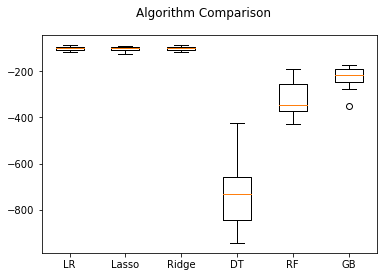

In [201]:
X=df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y=df['Yearly Amount Spent']
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('Ridge',Ridge()))
models.append(('DT',DecisionTreeRegressor()))
models.append(('RF',RandomForestRegressor()))
models.append(('GB',GradientBoostingRegressor()))
# models.append(XGBRegressor())
results = []
names = []
scoring = 'neg_mean_squared_error'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Summarize as follows (10 MARKS)
* a. Summarize the overall fit of the model and list down the measures to prove that it is a good model
* b. Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain  the relationship. Feel free to use charts or graphs to explain.
* c. What changes from the base model had the most effect on model performance?
* d. What are the key risks to your results and interpretation?

In [202]:
# Our final model will be linear regression only as there is linear relationship between independent and dependent variables.

In [203]:
X=df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y=df['Yearly Amount Spent']

 
# Using Feature selection: [backward elimination & RFE as both are giving same result for input features.]
from sklearn.metrics import r2_score,mean_squared_error
X=df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y=df['Yearly Amount Spent']
X_train,X_test,y_train,y_test=train_test_split(Xc,y,test_size=.3,random_state=None)
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)

print('train accuracy:',lr.score(X_train,y_train));print('test accuracy:',lr.score(X_test,y_test))
print('r2_score:',r2_score(y_test,ypred))
print('mean_squared_error',mean_squared_error(y_test,ypred))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,ypred)))

train accuracy: 0.9816639837681103
test accuracy: 0.9885385187570044
r2_score: 0.9885385187570044
mean_squared_error 91.83294542929053
root mean_squared_error 9.582950768384993


In [204]:

##### feature selection using KBest:[numerical only]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kb=SelectKBest(score_func=f_regression,k=3)

X=df[['Avg. Session Length', 'Time on App','Time on Website' ,'Length of Membership']]
y=df['Yearly Amount Spent']

fit = kb.fit(X,y)
# summarize scores
# set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
print(features[0:4,:])
#  	Avg. Session Length,Time on App,Length of Membership [features selected by kbest feature selector]

X.head(1)

[7.18512291e+01 1.65405785e+02 3.47310639e-03 9.43874313e+02]
[[34.49726773 12.65565115  4.08262063]
 [31.92627203 11.10946073  2.66403418]
 [33.00091476 11.33027806  4.1045432 ]
 [34.30555663 13.71751367  3.12017878]]


,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621


In [208]:
# As we can observe this feature is not at all good predictor of target varibale.
# This is the reason why its reject by all 4 feature selection methods.
# This can be confirmed by taking a look at the summary given below.
X=df[['Time on Website']]
y=df['Yearly Amount Spent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=None)
lr=LinearRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)

print('train accuracy:',lr.score(X_train,y_train));print('test accuracy:',lr.score(X_test,y_test))
print('r2_score:',r2_score(y_test,ypred))
print('mean_squared_error',mean_squared_error(y_test,ypred))
print('root mean_squared_error',np.sqrt(mean_squared_error(y_test,ypred)))

train accuracy: 0.0034627047939689293
test accuracy: -0.04781772185488986
r2_score: -0.04781772185488986
mean_squared_error 6576.565332445011
root mean_squared_error 81.09602538007033
